# Partial Visual Overview of Labs for 6007

In order to run this notebook, you will need to install the [Graphviz](http://graphviz.org/) app:

    brew install graphviz

And Python's [graphviz](http://graphviz.readthedocs.io/en/latest/) library:

    conda install graphviz

In [ ]:
from graphviz import Digraph

## Lab 1.1: Intro

In the first lab, we will be creating a script that writes a file to a static website on S3:

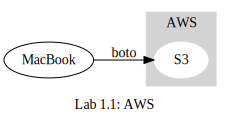

In [2]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 1.1: AWS"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=lightgrey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')
aws.node('S3')

g.subgraph(aws)

g.edge('MacBook', 'S3', 'boto')

g

## Lab 1.2: The Internet

In the second lab, we will add a component that pulls data from a 3rd party REST API (namely, Twitter) and publishes that data to the website we built the day before.

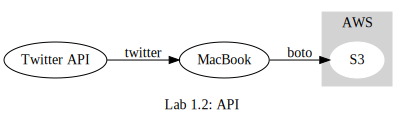

In [3]:
g.body.append(r'label = "Lab 1.2: API"')

g.edge('Twitter API', 'MacBook', 'twitter')

g

## Lab 2.1: Virtualization

In this lab, we will be creating our own web server using a locally hosted Linux virtual machine.

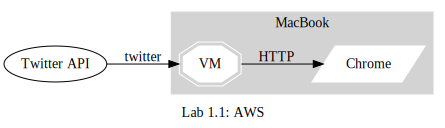

In [117]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 1.1: AWS"')

mac = Digraph('cluster_0')
mac.body.append('style=filled')
mac.body.append('color=lightgrey')
mac.node_attr.update(style='filled', color='white')
mac.body.append('label = "MacBook"')
mac.node('VM', shape='doubleoctagon')
mac.node('Chrome', shape='parallelogram')

mac.edge('VM', 'Chrome', 'HTTP')

g.subgraph(mac)

g.edge('Twitter API', 'VM', 'twitter')

g

## Lab 2.2: Linux

## Lab 2.3: Elastic Cloud Compute

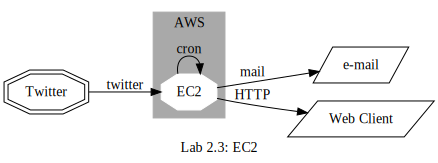

In [147]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 2.3: EC2"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=darkgrey')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')
aws.node('EC2', shape='octagon')

g.subgraph(aws)

g.node('Twitter', shape='doubleoctagon')
g.node('e-mail', shape='parallelogram')
g.node('Web Client', shape='parallelogram')
g.edge('EC2', 'EC2', 'cron')
g.edge('Twitter', 'EC2', 'twitter')
g.edge('EC2', 'e-mail', 'mail')
g.edge('EC2', 'Web Client', 'HTTP')

g

## Lab 2.4: MongoDB

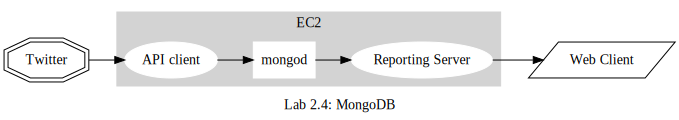

In [151]:
g = Digraph('G')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 2.4: MongoDB"')

ec2 = Digraph('cluster_1')

ec2.body.append('style=filled')
ec2.body.append('color=grey')
ec2.node_attr.update(style='filled', color='white')
ec2.node_attr.update(style='filled')
ec2.node('api', 'API client')
ec2.node('mongod', shape='cylinder')
ec2.node('server', 'Reporting Server')
ec2.edges([('api', 'mongod'), ('mongod', 'server')])
ec2.body.append('label = "EC2"')
ec2.body.append('color=lightgrey')

g.subgraph(ec2)

g.node('Twitter', shape='doubleoctagon')
g.node('www', 'Web Client', shape='parallelogram')
g.edge('Twitter', 'api')
g.edge('server', 'www')

g

## Lab 3.1: PostgreSQL

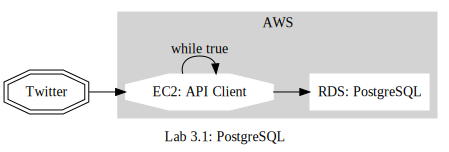

In [156]:
g = Digraph('G')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Lab 3.1: PostgreSQL"')

aws = Digraph('cluster_1')

aws.body.append('style=filled')
aws.body.append('color=lightgrey')
aws.node_attr.update(style='filled', color='white')

aws.node_attr.update(style='filled')
aws.node('EC2', 'EC2: API Client', shape='octagon')
aws.node('RDS', 'RDS: PostgreSQL', shape='cylinder')
aws.edge('EC2', 'RDS')
aws.edge('EC2', 'EC2', 'while true')
aws.body.append('label = "AWS"')
aws.body.append('color=lightgrey')

g.subgraph(aws)
g.node('Twitter', shape='doubleoctagon')
g.edge('Twitter', 'EC2')
g

## Lab 3.2: Relational Data Modeling

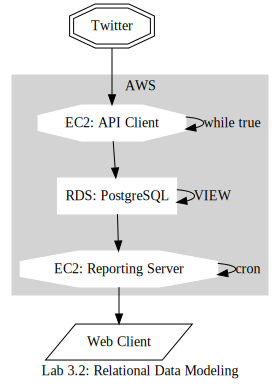

In [157]:
g = Digraph('G')
g.body.append(r'label = "Lab 3.2: Relational Data Modeling"')

aws.node('EC2b', 'EC2: Reporting Server', shape='octagon')
aws.edge('RDS', 'RDS', 'VIEW')
aws.edge('RDS', 'EC2b')
aws.edge('EC2b', 'EC2b', 'cron')

g.subgraph(aws)
g.node('Twitter', shape='doubleoctagon')
g.node('Web Client', shape='parallelogram')
g.edge('Twitter', 'EC2')
g.edge('EC2b', 'Web Client')

g

## Lab 4.2: Distributed Systems

![+ipyparallel](images/data_transfer_managment_summary.jpg)